In [13]:
#mengimport library yang dibutuhkan
import numpy as np 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
dataset= pd.read_csv("labeling_dataset.csv")

In [15]:
dataset.replace('\?', np.nan, regex = True, inplace = True) #untuk menghilangkan ambiguitas, maka semua tanda "\?" atau karakter yang tidak dikenali diganti ke NaN

In [16]:
dataset= dataset.dropna()

In [17]:
dataset.isna().sum()

full_text    0
sentimen     0
kategori     0
dtype: int64

In [18]:
dataset.head()

,full_text,sentimen,kategori
0,"Pada masa pandemi COVID 19 mendera, pembelajar...",positif,Confidience
2,"Semenjak pandemi covid-19, penggunaan berbagai...",positif,Control
3,"Dimasa pandemi covid, semua ruang gerak dibata...",positif,Comitment
4,"Saat pandemi covid-19, proses pembelajaran dil...",positif,Comitment
5,📚Departemen Hubungan Internasional📚\n\nSebagai...,positif,Comitment


In [19]:
#mengecek distribusi sentimen
dataset['sentimen'].value_counts()

positif    707
negatif    283
Name: sentimen, dtype: int64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


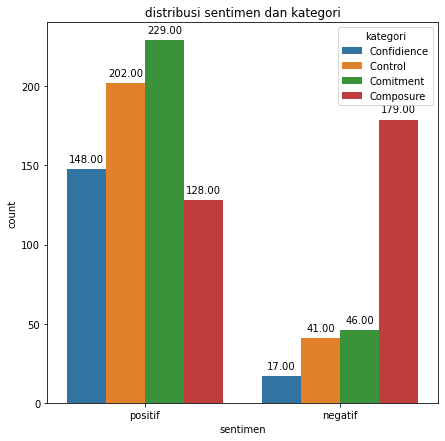

In [26]:
plt.figure(figsize=(7,7))
sc= sns.countplot(dataset['sentimen'],hue=dataset['kategori'])
for p in sc.patches:
    sc.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("distribusi sentimen dan kategori");

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentimen', ylabel='count'>

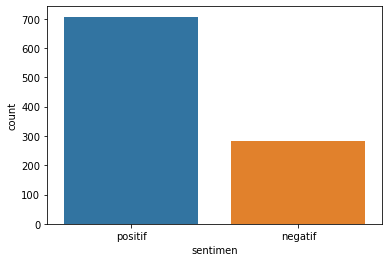

In [20]:
#visualisasi distribusi kelas positif negatif dari dataset
#visualisasi kategori sentimen
sns.countplot(dataset['sentimen'])

tampak bahwa, terdapat ketidakseimbangan kelas antara kelas positif dan negatif, sehingga untuk mendapatkan hasil yang akurat dan representatif dilakukan resampling (Over resampling)

In [27]:
#transformasi variabel categorical menjadi numerical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
label_encoder= LabelEncoder()

dataset['sentimen']= label_encoder.fit_transform(dataset['sentimen'])
dataset['kategori']= label_encoder.fit_transform(dataset['kategori'])


In [28]:
dataset 

,full_text,sentimen,kategori
0,"Pada masa pandemi COVID 19 mendera, pembelajar...",1,2
2,"Semenjak pandemi covid-19, penggunaan berbagai...",1,3
3,"Dimasa pandemi covid, semua ruang gerak dibata...",1,0
4,"Saat pandemi covid-19, proses pembelajaran dil...",1,0
5,📚Departemen Hubungan Internasional📚\n\nSebagai...,1,0
...,...,...,...
1065,"MY BEST, APLIKASI PEMBELAJARAN GA PAKE RIBET\n...",0,0
1066,Hari Pendidikan Nasional Saat Pandemi COVID-19...,1,3
1067,Pesan Mendikbud di Hari Pendidikan Nasional Sa...,1,3
1068,Sekolah Karakter GIS kembangkan pendidikan men...,1,2


keterangan sentimen : 
1 = positive
0 = negatif

In [29]:
dataset.corr()

,sentimen,kategori
sentimen,1.000000,0.107575
kategori,0.107575,1.000000


In [30]:
X=dataset['full_text'].values #variabel independen

In [31]:
y=dataset['sentimen'].values #variabel output (dependen) dalam hal ini berupa 4 kategori sentimen

# Melakukan pembersihan text

pemebresihan teks perlu dilakukan agar teks bisa diproses lebih lanjut, beberapa step yang dilakukan adalah penghapusan tanda baca seperti : koma, titik tanda kutip dsb, men

In [32]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 990): #isi range harus sesuai dengan berapa banyak row data yang dimiliki, (awalnya 1070, namun setelah didrop missing valuenya menjadi 990)
  review = re.sub('[^a-zA-Z]', ' ', X[i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Creating the Bag of Words model

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X_ = cv.fit_transform(corpus).toarray()
y = dataset['sentimen'].values

# splitting dataset

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.20, random_state = 0)

In [35]:
#mengimport modul untuk eksekusi algoritma Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train, y_train) #melatih model dari data training yang ada

GaussianNB()

In [36]:
#testing dan prediksi
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) #output

[[0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]

In [37]:
#kalkulasi akurasi 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("skor akurasi adalah : ", accuracy_score(y_test,y_pred))

[[29 26]
 [52 91]]
skor akurasi adalah :  0.6060606060606061


In [38]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.53      0.43        55
           1       0.78      0.64      0.70       143

    accuracy                           0.61       198
   macro avg       0.57      0.58      0.56       198
weighted avg       0.66      0.61      0.62       198



# mari kita coba melakukan resampling 

In [44]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
X_= dataset['full_text'].values.reshape(-1,1)

In [46]:
y= dataset['sentimen']

In [47]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_, y)

print("terdapat", X_ros.shape[0] - X.shape[0], 'titik/raw data yang di-resampling')

terdapat 424 titik/raw data yang di-resampling


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentimen', ylabel='count'>

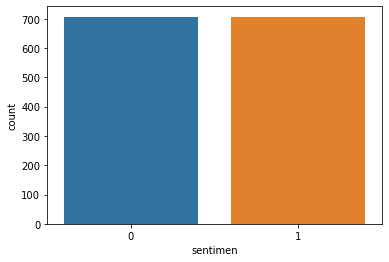

In [48]:
#mengecek distribusi data keseimbangan data
sns.countplot(y_ros) #dapat dilihat bahwa data telah seimbang

In [49]:
#mengecek jumlah rawdata
data_sampling = pd.DataFrame({"kategori": y_ros})
data_sampling

,kategori
0,1
1,1
2,1
3,1
4,1
...,...
1409,0
1410,0
1411,0
1412,0


terdapat 1414 raw

In [50]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1414): #isi range harus sesuai dengan berapa banyak row data yang dimiliki, (awalnya 1070, namun setelah didrop missing valuenya menjadi 990)
  review = re.sub('[^a-zA-Z]', ' ', str(X_ros[i])) #sumbu X harus berbentuk string sehingga X-ros dicovert menjadi string
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X_ = cv.fit_transform(corpus).toarray()
y = y_ros

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.20, random_state = 0)

In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
#kita tabulasi nilai sebenarnya dan nilai prediksi

output= pd.DataFrame({"nilai_sebenarnya" : y_test, "hasil_prediksi" : y_pred})
output

,nilai_sebenarnya,hasil_prediksi
278,1,0
1278,0,0
464,0,0
152,1,1
202,1,1
...,...,...
1140,0,1
1045,0,0
1158,0,0
390,1,1


In [56]:
#agar lebih jelas secara matematis,maka dilakukan perhitungan akurasi dengan confussion matriks dan akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("tingkat akurasi prediksi dengan naive bayes adalah :", accuracy_score(y_test, y_pred))

[[ 88  52]
 [ 23 120]]
tingkat akurasi prediksi dengan naive bayes adalah : 0.734982332155477


Dapat dilihat bahwa, dengan melakukan resampling akurasi dari model naive bayes meningkat dibandingkan dengan tanpa resampling

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       140
           1       0.70      0.84      0.76       143

    accuracy                           0.73       283
   macro avg       0.75      0.73      0.73       283
weighted avg       0.74      0.73      0.73       283

